In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import scipy

from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns
from cycler import cycler


In [5]:
dic = os.getcwd() + "/data/layout_data.xlsx"

wind_data = pd.read_excel(dic)
wind_data.rename(columns={'Speed at hh - 160':'160','Speed at hh - 105':'105','Speed at hh - 120':'120','Speed at hh - 134':'134'},inplace=True)
wind_data.dropna(inplace=True)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)
wind_data

,160,105,120,134,Mean Direction
0,12.5,11.7,11.9,12.1,230.0
1,13.3,12.4,12.7,12.9,230.0
2,13.3,12.4,12.7,12.9,230.0
3,14.0,13.2,13.4,13.7,230.0
4,14.0,13.2,13.4,13.7,230.0
...,...,...,...,...,...
8728,17.8,16.8,17.2,17.5,250.0
8729,15.4,14.6,14.9,15.2,290.0
8730,13.1,12.4,12.7,12.9,310.0
8731,11.6,11.0,11.2,11.4,310.0


In [20]:
wind_data.drop(wind_data[wind_data['160'] == 0].index,inplace=True)
wind_data.reset_index(inplace=True)

In [15]:
columns = wind_data.columns.array
arr_height = columns[[0,1,2,3]]
arr_height

<NumpyExtensionArray>
['160', '105', '120', '134']
Length: 4, dtype: object

In [8]:
arr_shape = np.ndarray(shape=(4,8))

arr_scale =  np.ndarray(shape=(4,8))

In [16]:
def visualisation(x,height,i):
    sns.set_theme()
    sns.set_style(rc = {'axes.facecolor': 'w'})


    plt.rc('lines', linewidth=1.5, linestyle='-')
    plt.rcParams['axes.prop_cycle'] = cycler(color=['#20202077',
                                                '#029020dd',
                                                '#FF8C00dd',
                                                '#ff00ffcc',
                                                '#2020ffdd']
                                                # alpha=[1, 1, 1, 1, .7]
                                            )

    x.summary(plot=True, lw=2)

    plt.gca().set_axisbelow(True)
    plt.gca().grid(color='#cccccccc', linestyle=':', 
                linewidth=1.5, which='both')
    #plt.gca().plot(color='blue')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.plot(color='blue')
    plt.savefig('%s/figures/fig_%s_%i.png' % (os.getcwd(),height,i))

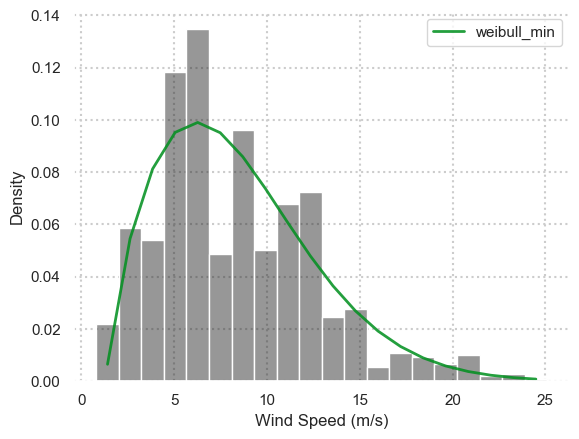

In [30]:
i = 0
for height in arr_height:

        # 1/8, bins=35
        df = wind_data[((wind_data['Mean Direction']<22.5))]
        df_2 = wind_data[(wind_data['Mean Direction'] > 337.5)]

        wind_np_1 = df[height].to_numpy()
        wind_np_2 = df_2[height].to_numpy()
        wind_np = np.append(wind_np_1,wind_np_2)

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,1)
        arr_scale[i][0] = f.fitted_param['weibull_min'][0]
        arr_shape[i][0] = f.fitted_param['weibull_min'][2]
        

        # 2/8, bins=24
        df = wind_data[(wind_data['Mean Direction'] >22.5) & (wind_data['Mean Direction'] <=67.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,2)
        arr_scale[i][1] = f.fitted_param['weibull_min'][0]
        arr_shape[i][1] = f.fitted_param['weibull_min'][2]

        # 3/8, bins=21 # 67.5 - 112.5
        df = wind_data[(wind_data['Mean Direction'] >67.5) & (wind_data['Mean Direction'] <=112.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,3)
        arr_scale[i][2] = f.fitted_param['weibull_min'][0]
        arr_shape[i][2] = f.fitted_param['weibull_min'][2]

        # 4/8, bins=20 # 112.5 - 157.5
        df = wind_data[(wind_data['Mean Direction'] >112.5) & (wind_data['Mean Direction'] <=157.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,4)
        arr_scale[i][3] = f.fitted_param['weibull_min'][0]
        arr_shape[i][3] = f.fitted_param['weibull_min'][2]

        # 5/8, bins= 20 # 157.5 - 202.5
        df = wind_data[(wind_data['Mean Direction'] >157.5) & (wind_data['Mean Direction'] <=202.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,5)
        arr_scale[i][4] = f.fitted_param['weibull_min'][0]
        arr_shape[i][4] = f.fitted_param['weibull_min'][2]

        # 6/8,bins=20 # 202.5 - 247.5
        df = wind_data[(wind_data['Mean Direction'] >202.5) & (wind_data['Mean Direction'] <=247.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,6)
        arr_scale[i][5] = f.fitted_param['weibull_min'][0]
        arr_shape[i][5] = f.fitted_param['weibull_min'][2]
        
        #  7/8,bins=42 # 247.5 - 292.5
        df = wind_data[(wind_data['Mean Direction'] >247.5) & (wind_data['Mean Direction'] <=292.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,7)
        arr_scale[i][6] = f.fitted_param['weibull_min'][0]
        arr_shape[i][6] = f.fitted_param['weibull_min'][2]

        # 8/8, bins=30 # 
        df = wind_data[(wind_data['Mean Direction'] >292.5) & (wind_data['Mean Direction'] <=337.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,8)
        arr_scale[i][7] = f.fitted_param['weibull_min'][0]
        arr_shape[i][7] = f.fitted_param['weibull_min'][2]

        i=i+1

In [29]:
arr_height

<NumpyExtensionArray>
['160', '105', '120', '134']
Length: 4, dtype: object

In [27]:
arr_scale

array([[1.66220044, 1.91168875, 1.24511366, 1.31679413, 2.93827587,
        2.28076424, 1.98264297, 1.73534934],
       [1.6522204 , 1.94889903, 1.20786851, 1.35592443, 2.93133805,
        2.29210661, 2.00461918, 1.71882566],
       [1.65593565, 1.9437954 , 1.2115087 , 1.34817449, 2.93869639,
        2.298088  , 2.00675576, 1.72250535],
       [1.66831377, 1.91446417, 1.23353366, 1.31454037, 2.92995831,
        2.28945118, 1.990183  , 1.73384782]])

In [28]:
arr_shape

array([[ 7.24879256,  7.76227534,  4.3259496 ,  5.69008537, 17.66719415,
        14.36120559, 11.62591526,  8.16527556],
       [ 6.76781047,  7.40325048,  3.96014434,  5.49453262, 16.63887301,
        13.56334898, 11.02890467,  7.61278307],
       [ 6.93449525,  7.55726665,  4.062872  ,  5.59721331, 17.02686559,
        13.88069914, 11.28032916,  7.79636699],
       [ 7.09267715,  7.55943584,  4.19680339,  5.55732389, 17.24797062,
        14.0567206 , 11.36853563,  7.96510521]])

## Output

In [86]:

        # 0: '160', 1:'105', 2:'120', 3:'134'
        # arr_scale[0] acceses therefore turbine with height 60.
        arr_scale = [[3.92121946e-01, 1.94889903e+00, 1.20786851e+00, 1.35592443e+00,
        2.93133805e+00, 2.29210661e+00, 2.00461918e+00, 1.71882566e+00],
       [2.95497141e-01, 1.94379540e+00, 1.21150870e+00, 1.34817449e+00,
        2.93869639e+00, 2.29808800e+00, 2.00675576e+00, 1.72250535e+00],
       [2.95332333e-01, 1.91446417e+00, 1.23353366e+00, 1.31454037e+00,
        2.92995831e+00, 2.28945118e+00, 1.99018300e+00, 1.73384782e+00],
       [5.97073335e-01, 5.05534606e+01, 2.52881099e-01, 6.71417823e+00,
        1.59188532e+07, 1.57966673e-01, 8.33225582e-01, 7.57076615e-01]]

        arr_shape = [[7.90580189e-01, 7.40325048e+00, 3.96014434e+00, 5.49453262e+00,
        1.66388730e+01, 1.35633490e+01, 1.10289047e+01, 7.61278307e+00],
       [1.35106671e+00, 7.55726665e+00, 4.06287200e+00, 5.59721331e+00,
        1.70268656e+01, 1.38806991e+01, 1.12803292e+01, 7.79636699e+00],
       [1.37307509e+00, 7.55943584e+00, 4.19680339e+00, 5.55732389e+00,
        1.72479706e+01, 1.40567206e+01, 1.13685356e+01, 7.96510521e+00],
       [1.82029111e+02, 4.83799253e+02, 2.07409832e+01, 6.76282397e+01,
        1.50263579e+08, 9.90614578e+00, 1.93797057e+01, 1.64789570e+01]]